In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
mnist = fetch_openml("mnist_784")

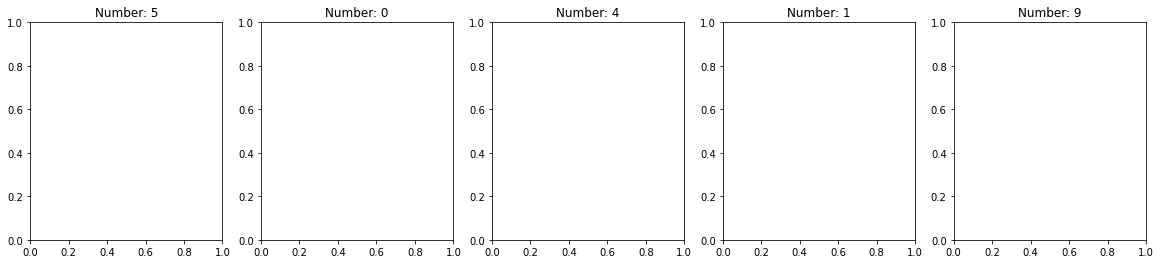

In [7]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[:5], mnist.target[:5])):
    plt.subplot(1, 5, index+1)
    plt.title("Number: %s" % label)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)

In [9]:
mdl = LogisticRegression(solver='lbfgs')
mdl.fit(X_train, y_train)
predictions = mdl.predict(X_test)
score = mdl.score(X_test, y_test)
print(score)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9206428571428571


In [11]:
index = 0
print("Prediction: " + mdl.predict([X_test[index]])[0])

KeyError: 0

In [14]:
cmatrix = metrics.confusion_matrix(y_test, predictions)
cmatrix

array([[1303,    0,    9,    5,    0,   11,   17,    1,    8,    2],
       [   0, 1542,   10,    2,    2,    3,    2,    4,   11,    3],
       [   5,   13, 1268,   24,   17,    5,   17,   15,   29,    8],
       [   2,    5,   25, 1281,    0,   48,    3,    6,   35,    9],
       [   2,    5,   13,    5, 1274,    2,   13,    4,   12,   53],
       [  11,    5,   17,   51,    7, 1058,   21,    3,   53,   15],
       [   4,    3,    7,    2,   11,   15, 1345,    2,    8,    0],
       [   2,    7,   17,   14,    9,    5,    1, 1323,    4,   55],
       [  11,   26,   10,   38,    9,   39,   13,    7, 1200,   19],
       [   9,    6,    4,   19,   40,    4,    0,   27,   16, 1295]])

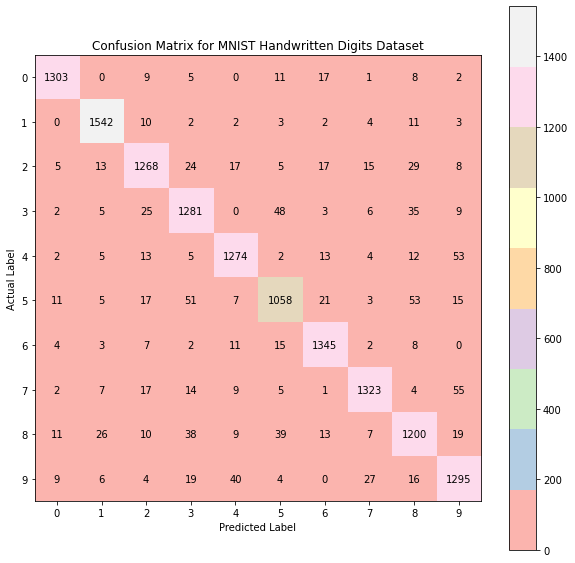

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(cmatrix, cmap='Pastel1')
plt.title('Confusion Matrix for MNIST Handwritten Digits Dataset')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.colorbar()

width, height = cmatrix.shape
for x in range (width):
    for y in range (height):
        plt.annotate(str(cmatrix[x][y]), xy=(y,x), horizontalalignment="center", verticalalignment="center")